In [1]:
#Employee Attrition Prediction Using Machine Learning (IBM HR Dataset)

In [47]:
#Import all the Requered Librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from xgboost import XGBRegressor
import pickle

In [3]:
#Load the DataSet File and view the First 5 rows data.
df = pd.read_csv("Data Sheet/Employee_Attrition_Prediction IBM_HR_Dataset.csv")
print("Lets see the Details of the Datasets.................\n")
df.head()

Lets see the Details of the Datasets.................



,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
#Check the total Columns of the Datasets.
print("Lets see the total columns that is exist into this Dataset is:\n")
old_columns = df.columns
print(old_columns)

Lets see the total columns that is exist into this Dataset is:

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [5]:
#Print shape of the datasheets.
print(f"The Total Numbers of the Columns is {df.shape[1]} and the total numbers of the Rows is {df.shape[0]} (Before)")

The Total Numbers of the Columns is 35 and the total numbers of the Rows is 1470 (Before)


In [6]:
#Remove the Unwanted Columns from the Datasets.
df.drop(columns=["EmployeeCount","EmployeeNumber","StandardHours","Over18"],inplace=True)
new_columns = df.columns
print(new_columns)

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


In [7]:
#Print new shape of the datasheets.
print(f"The Total Numbers of the Columns is {df.shape[1]} and the total numbers of the Rows is {df.shape[0]} (Before)")

The Total Numbers of the Columns is 31 and the total numbers of the Rows is 1470 (Before)


In [8]:
#Check the Null Values and remove it.
print("Lets check theere is any Null Values is present or not.........")

print(df.isnull().sum())

Lets check theere is any Null Values is present or not.........
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype:

In [9]:
#Check the Data Types of the all Columns
print("Lets check the Data Types of the all Columns............\n")
print(df.dtypes)

Lets check the Data Types of the all Columns............

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int

In [10]:
#Describe the All data columns values.
print("Lets Describe the all Columns data..........\n")
df.describe()

Lets Describe the all Columns data..........



,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [11]:
#Lets Saperate the object and Numarics columns.
object_columns = []
numaric_columns = []

for i in new_columns:
    if df[i].dtype == 'object':
        object_columns.append(i)
    else:
        numaric_columns.append(i)

#Print the Both Columns Saperately.
print("Objects Columns is:",object_columns)
print("Numaric Columns is:",numaric_columns)

Objects Columns is: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
Numaric Columns is: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


Lets Check there is any Outliers or not.


C:\Users\Admin\AppData\Local\Temp\ipykernel_2508\4010362957.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,4))


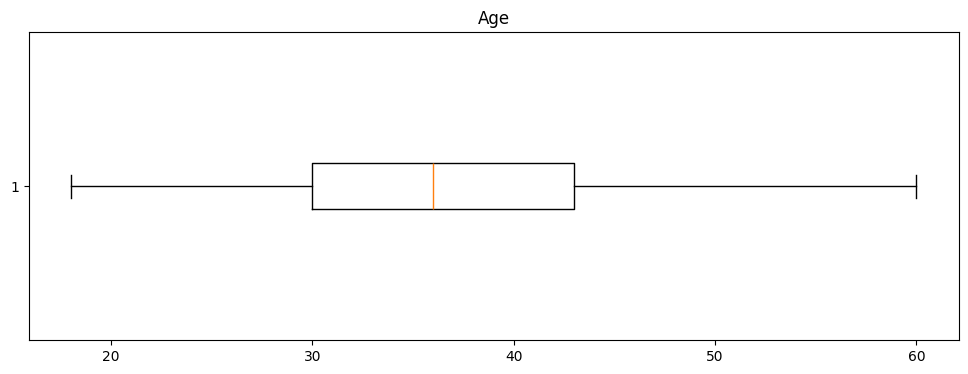

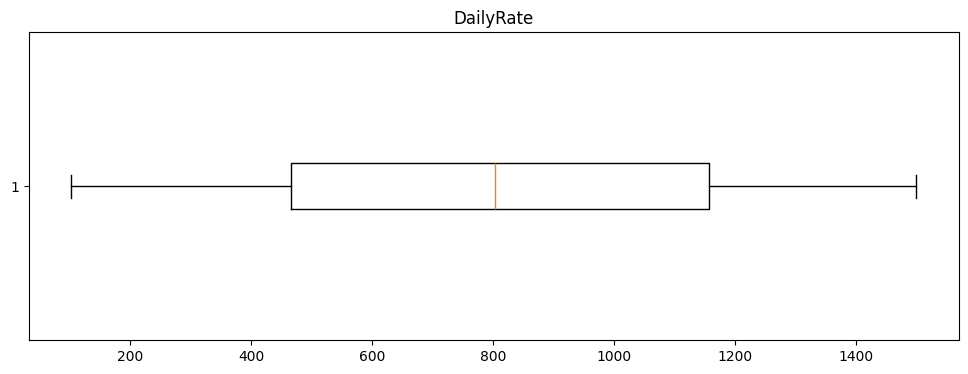

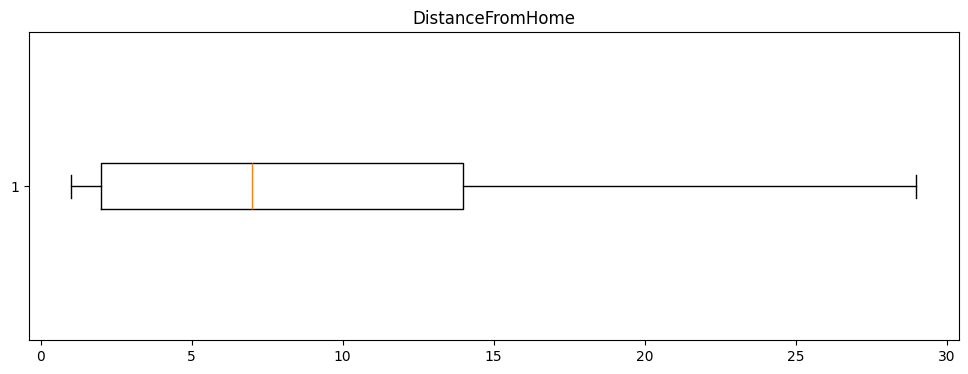

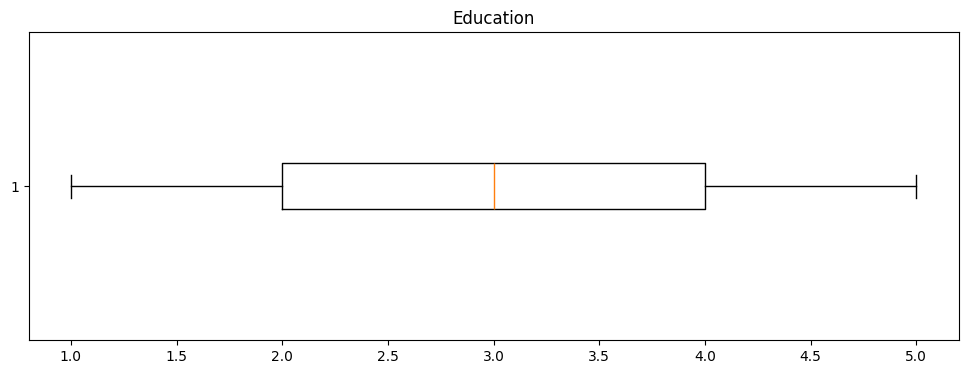

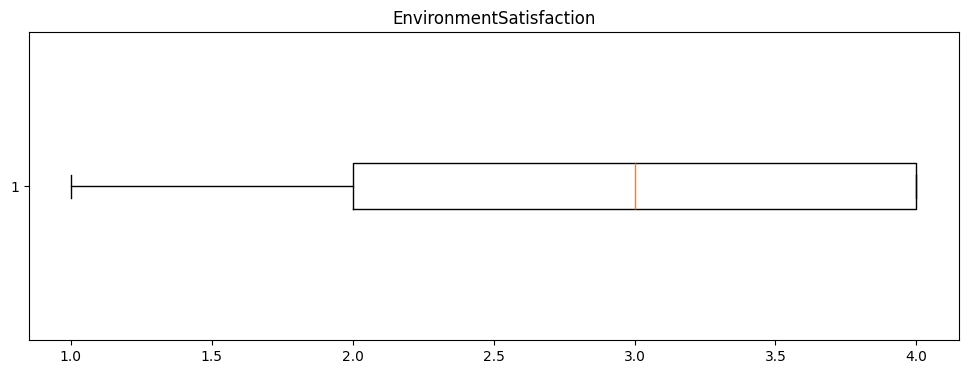

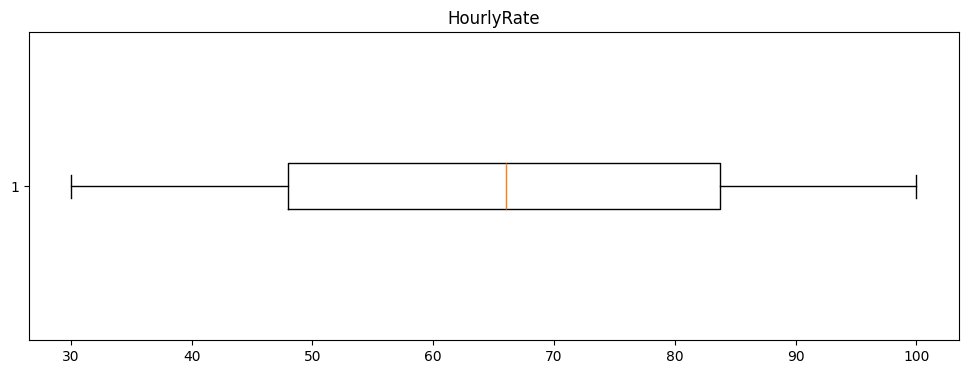

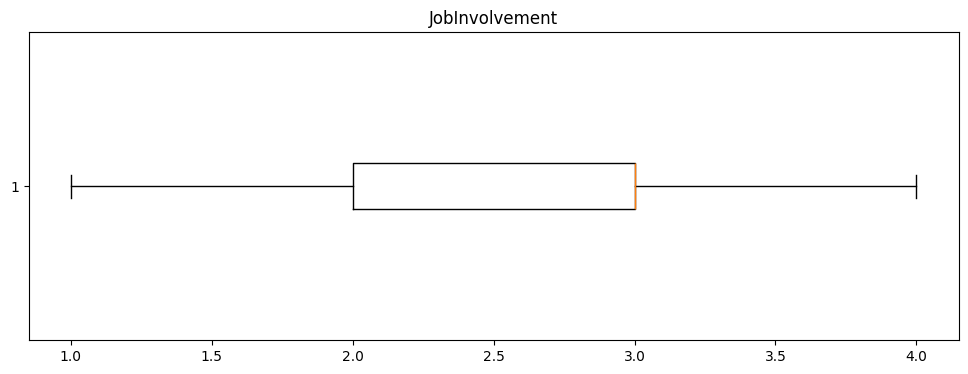

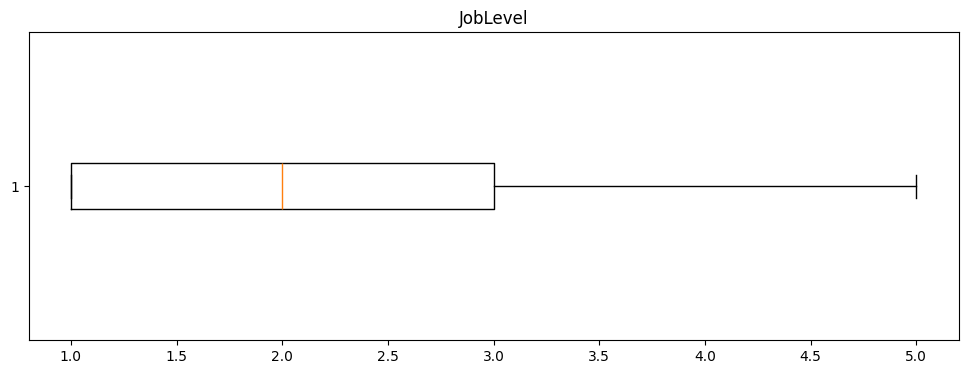

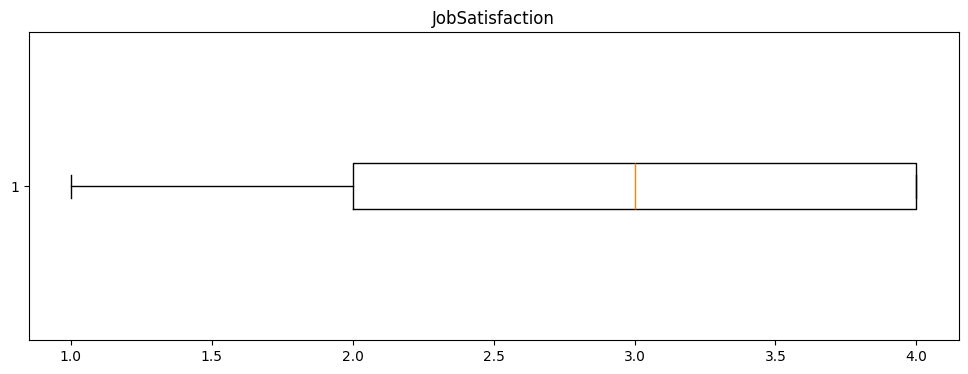

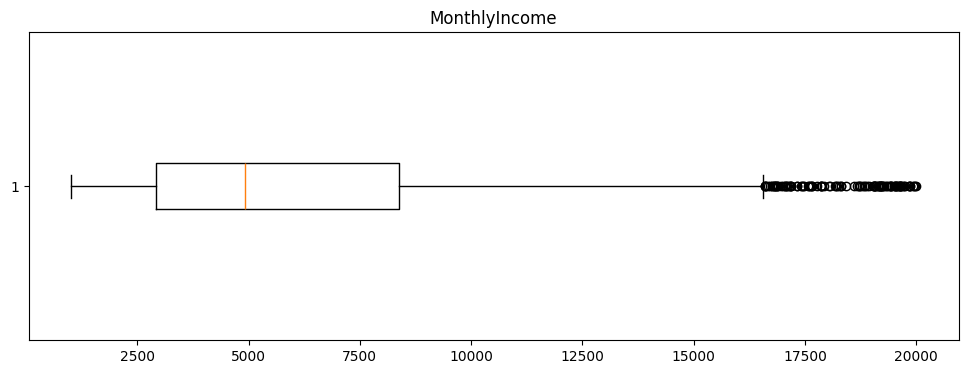

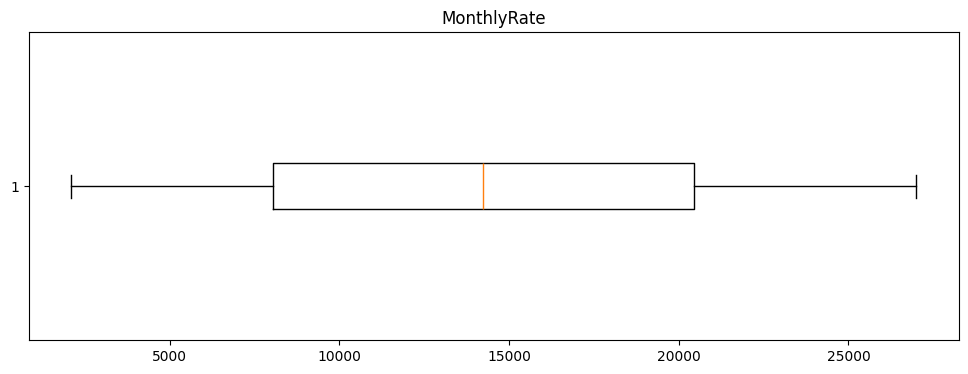

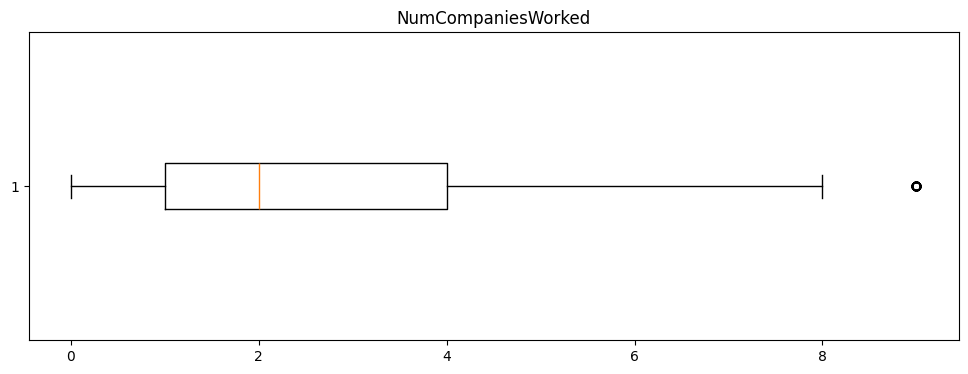

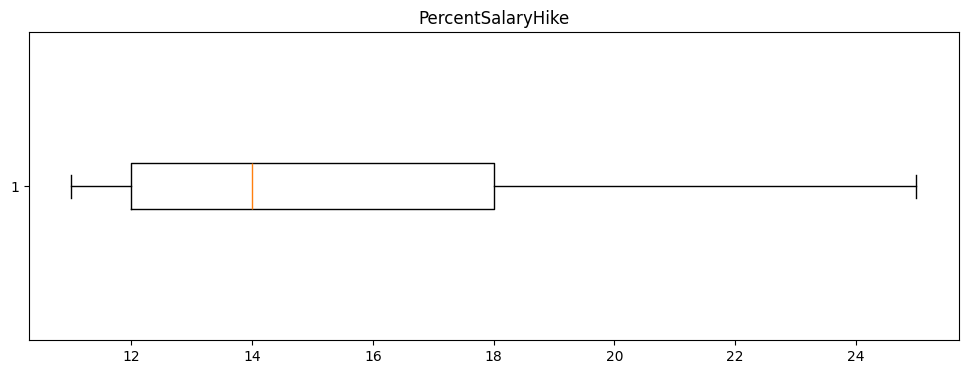

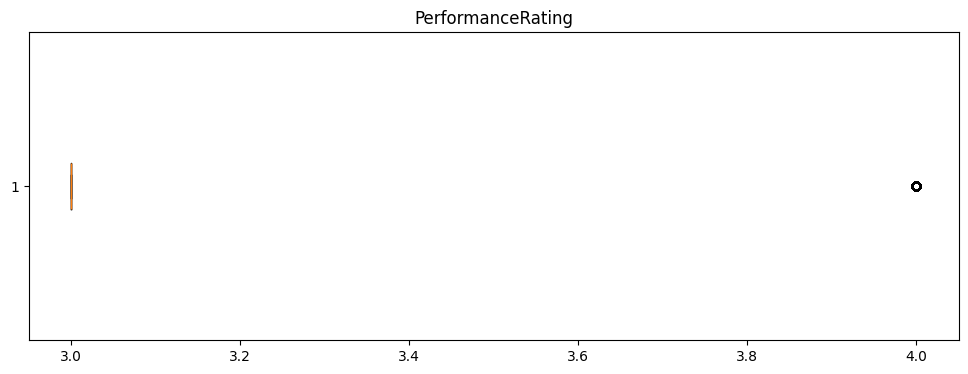

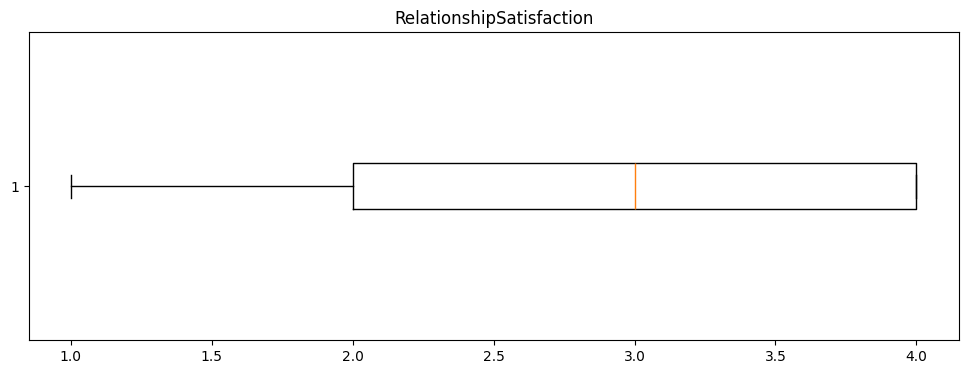

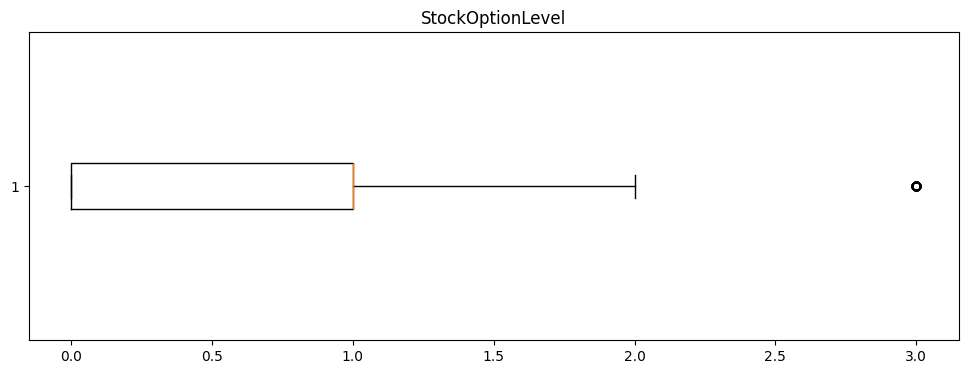

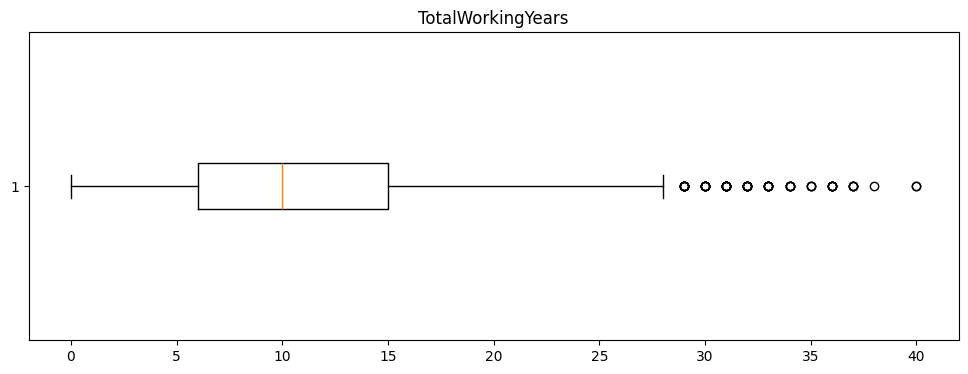

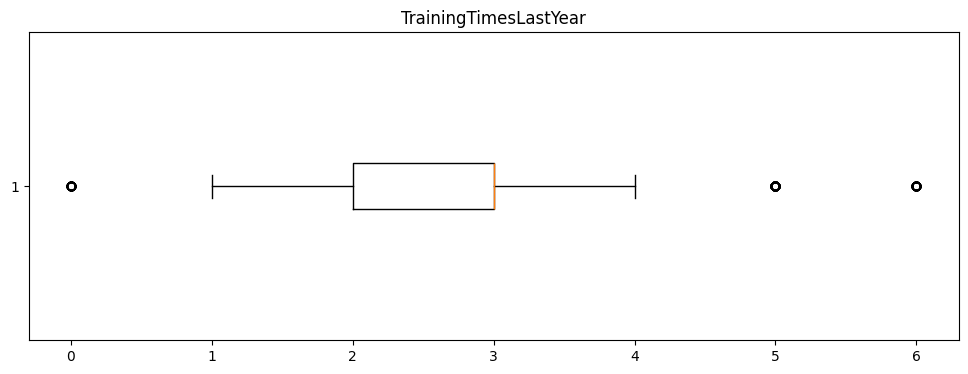

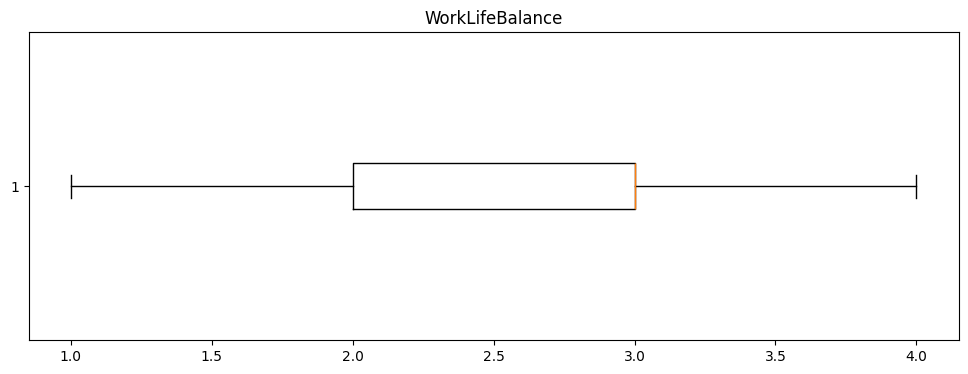

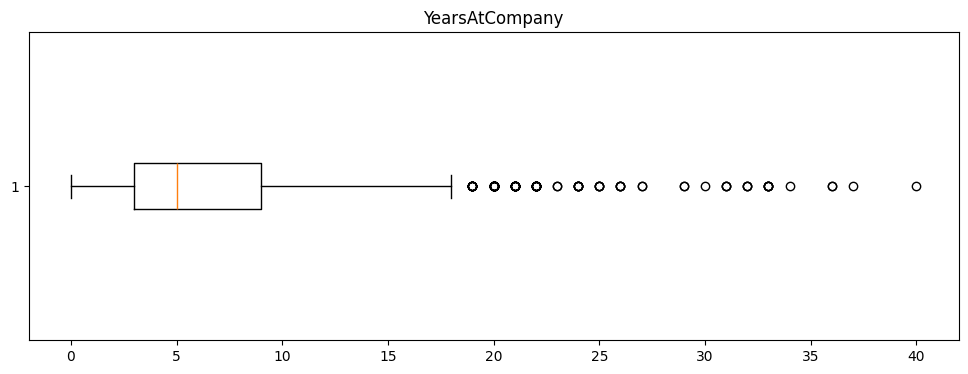

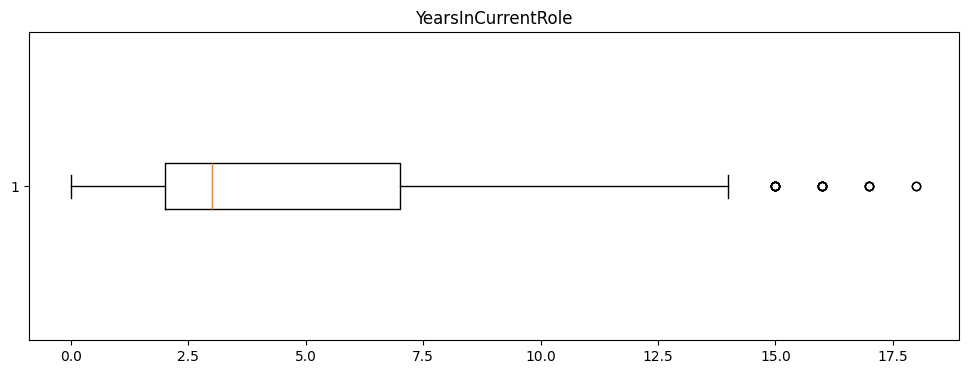

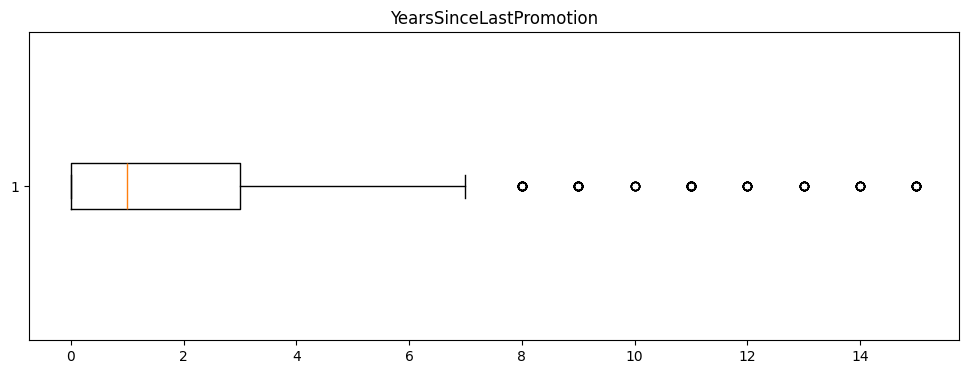

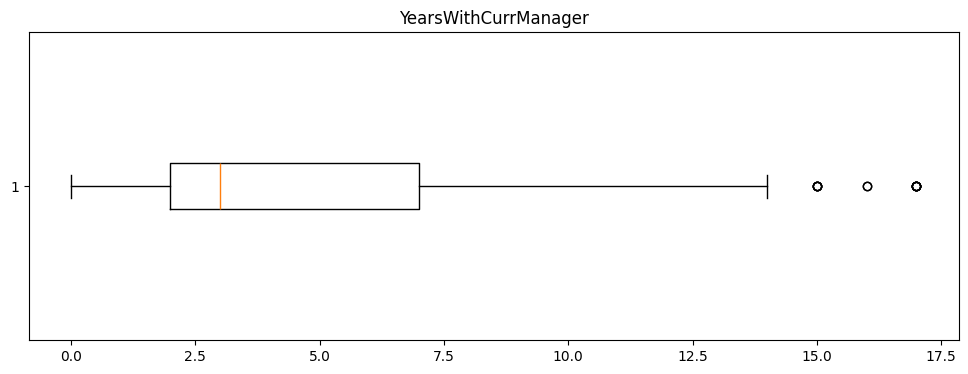

In [12]:
print("Lets Check there is any Outliers or not.")

for i in numaric_columns:
    plt.figure(figsize=(12,4))
    plt.boxplot(df[i],vert=False)
    plt.title(f"{i}")
plt.show()

In [13]:
#Lets remove the OutLiers From some columns.
print("Lets remove the Outliers from the Requered columns.........")
print("Using the IQR Method..........")

temp = ['MonthlyIncome','TotalWorkingYears','YearsAtCompany','YearsSinceLastPromotion','YearsWithCurrManager']

for i in temp:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)

    iqr = q3-q1

    min_range = q1 - (1.5*iqr)
    max_range = q3 + (1.5*iqr)

    df = df[(df[i] >= min_range) & (df[i] <= max_range)]
print("Outliers Removed...........")

Lets remove the Outliers from the Requered columns.........
Using the IQR Method..........
Outliers Removed...........


Lets Check there is any Outliers or not.


C:\Users\Admin\AppData\Local\Temp\ipykernel_2508\1307234324.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,4))


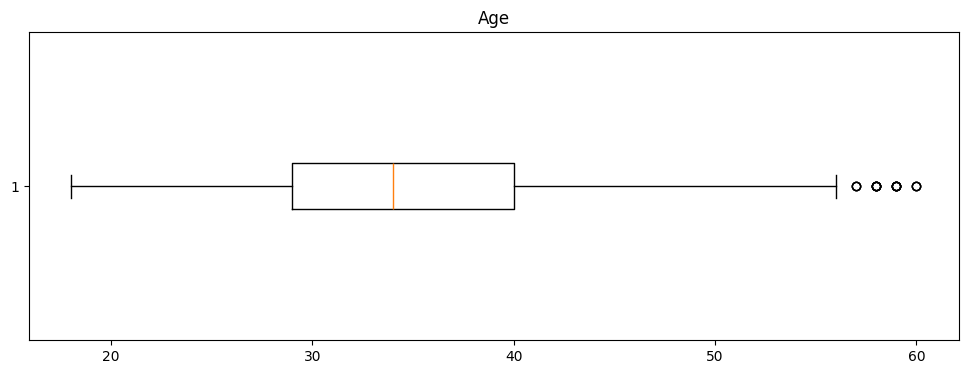

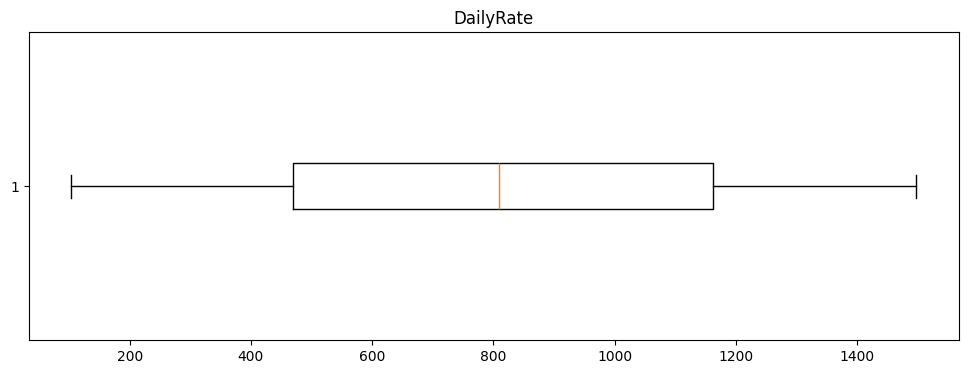

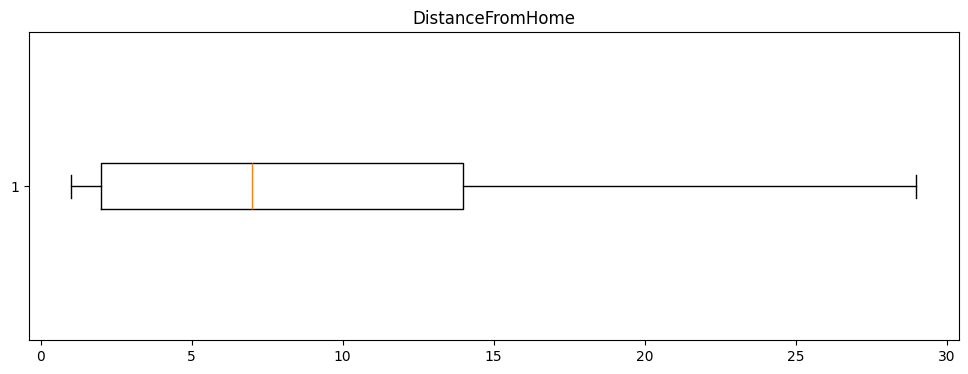

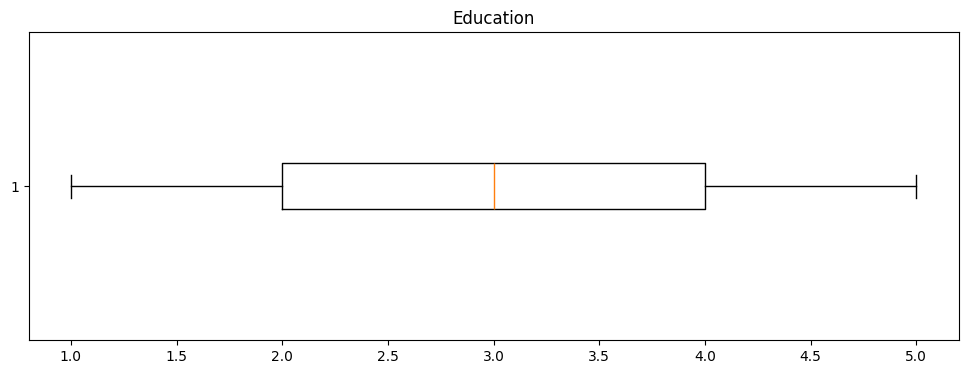

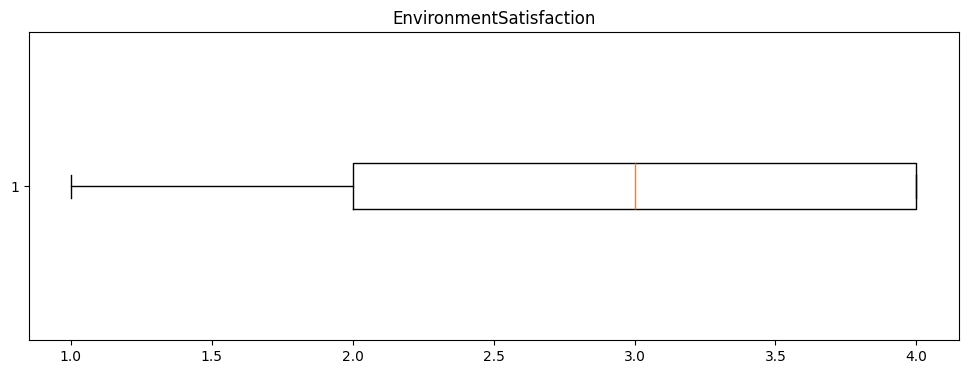

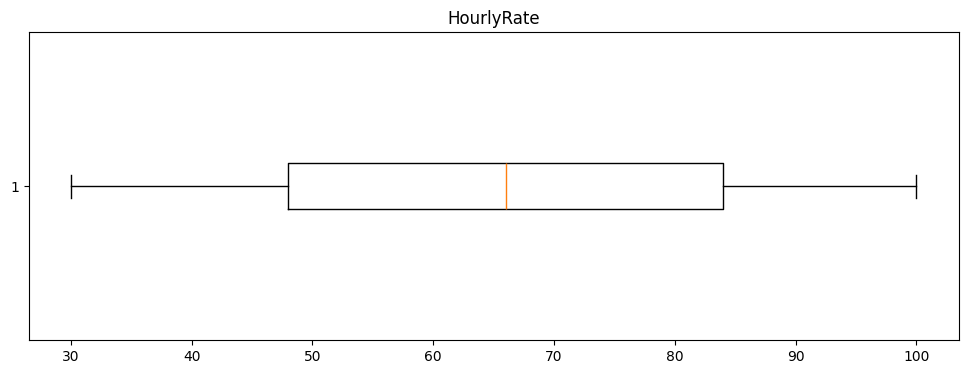

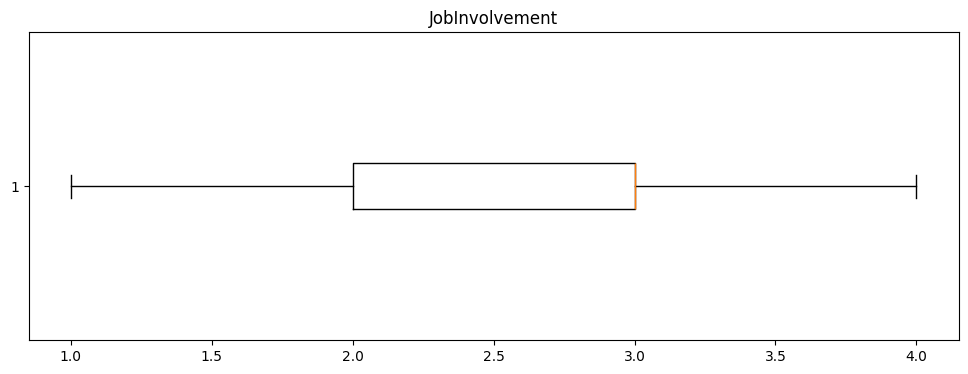

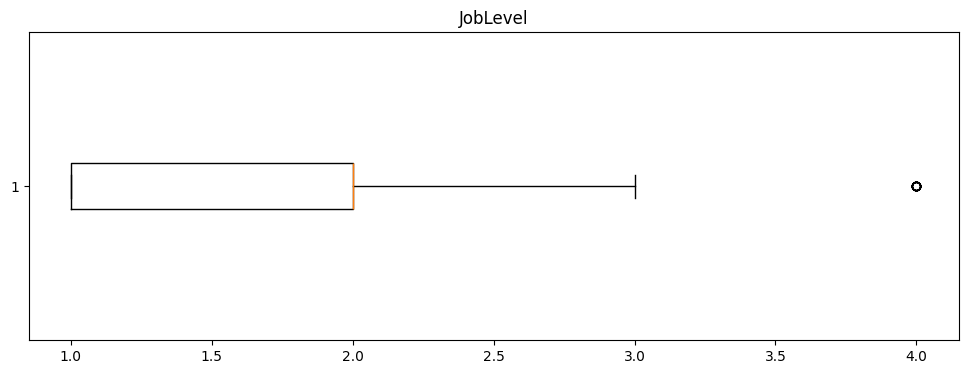

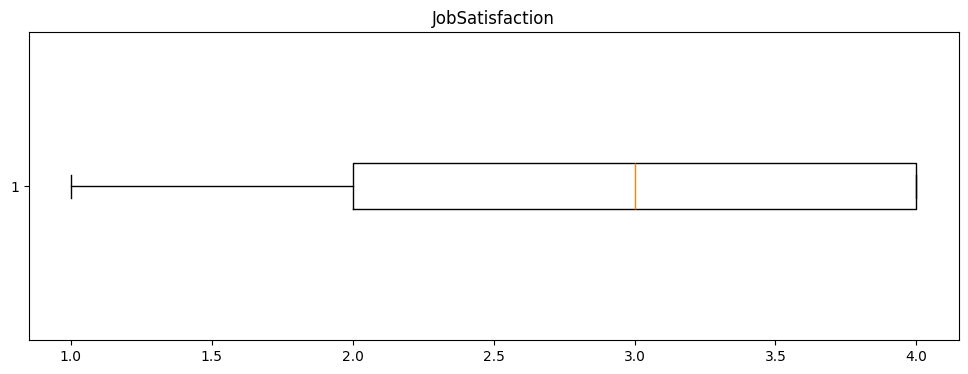

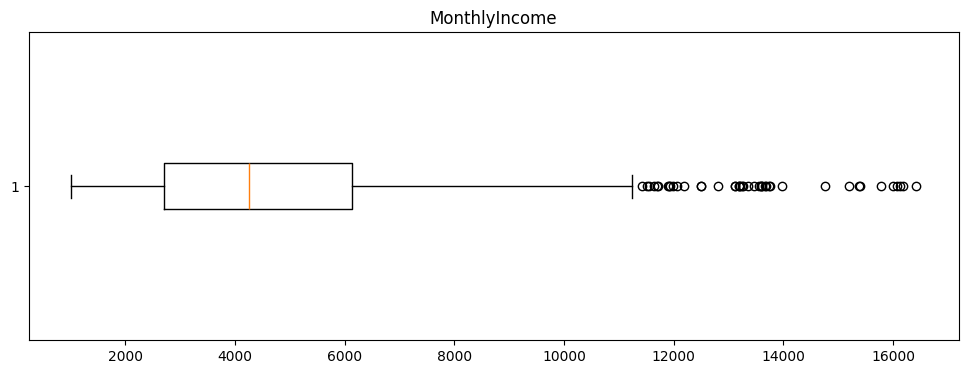

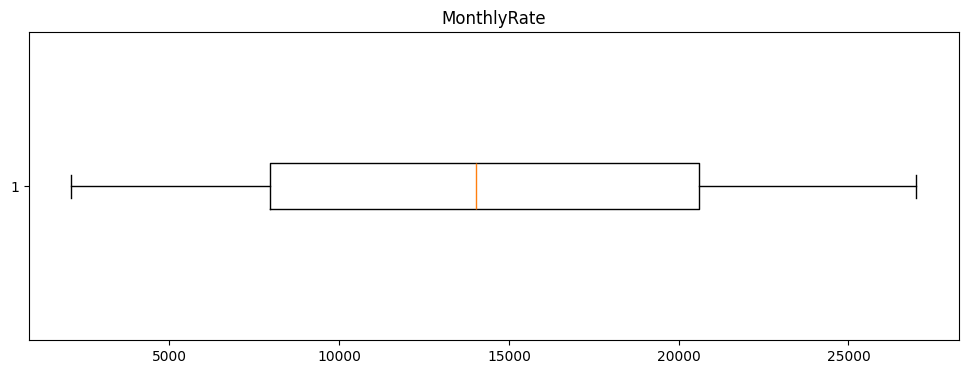

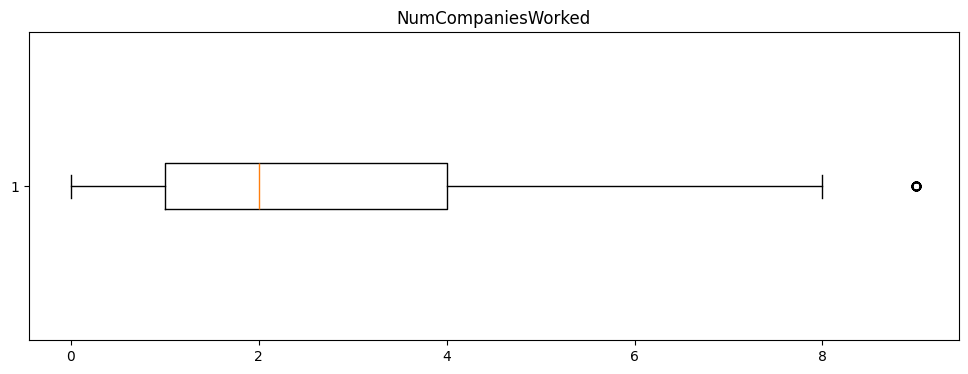

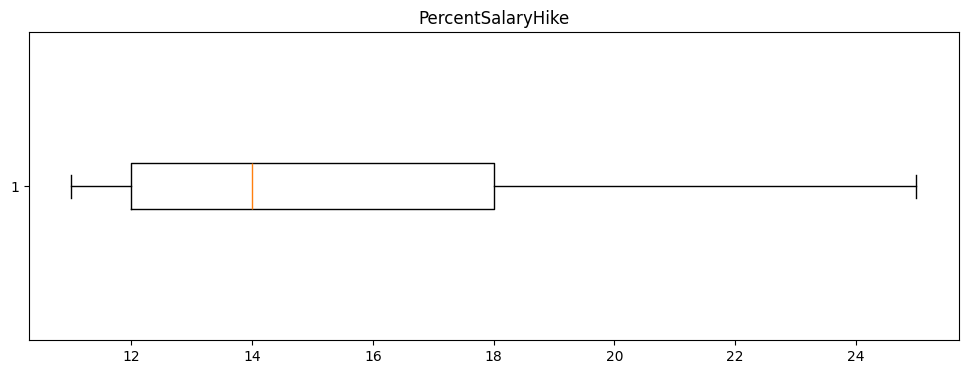

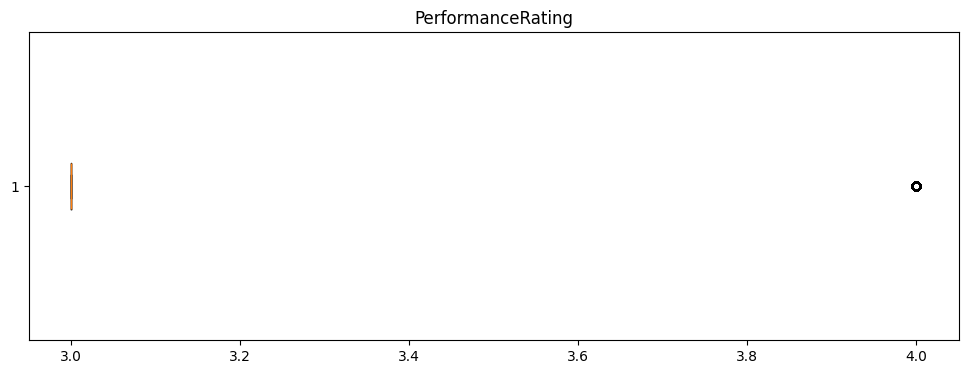

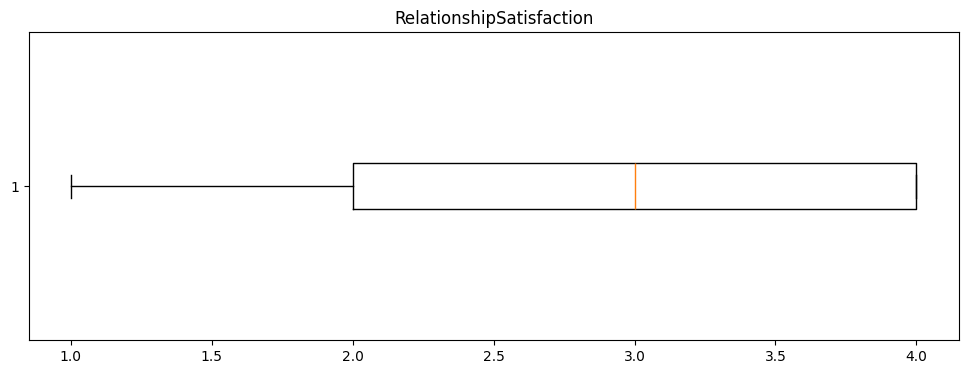

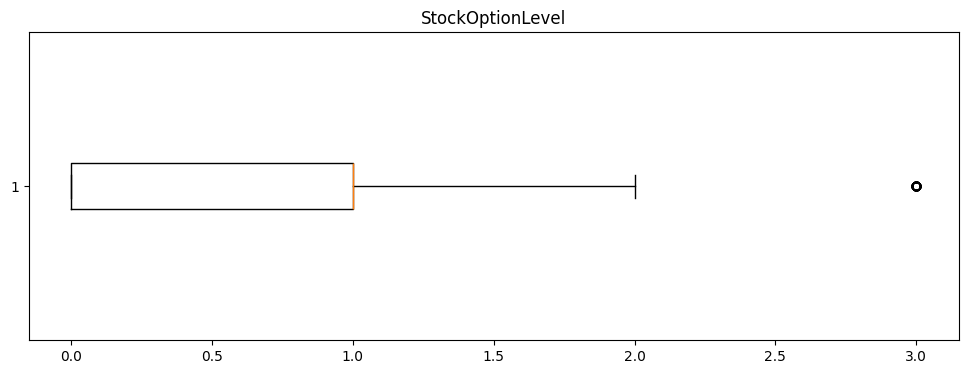

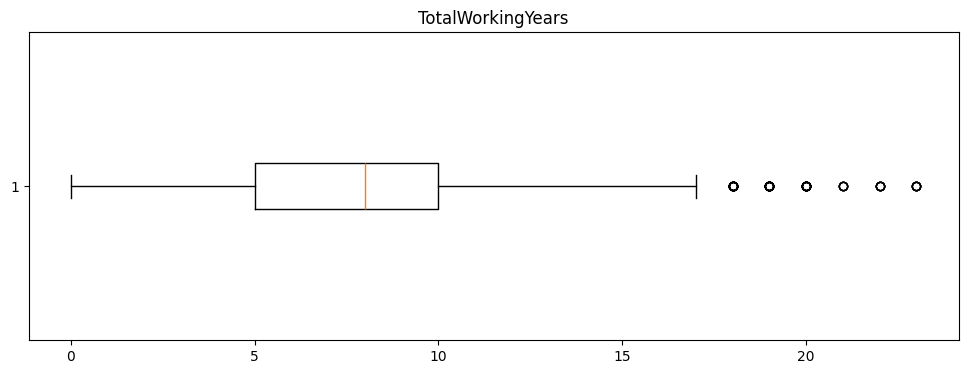

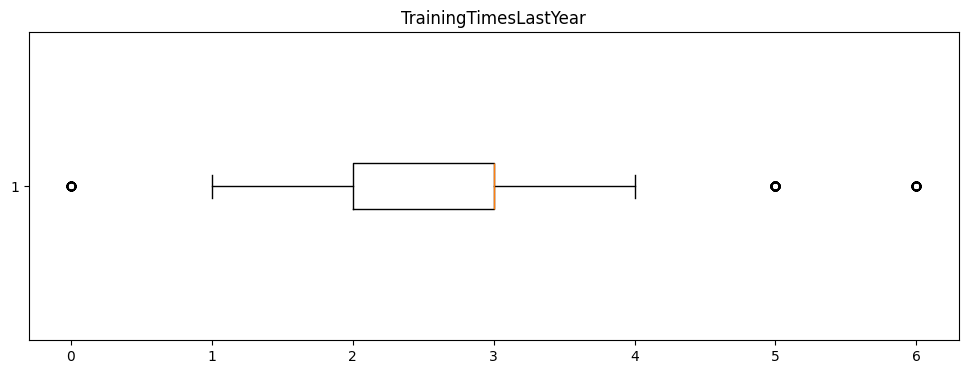

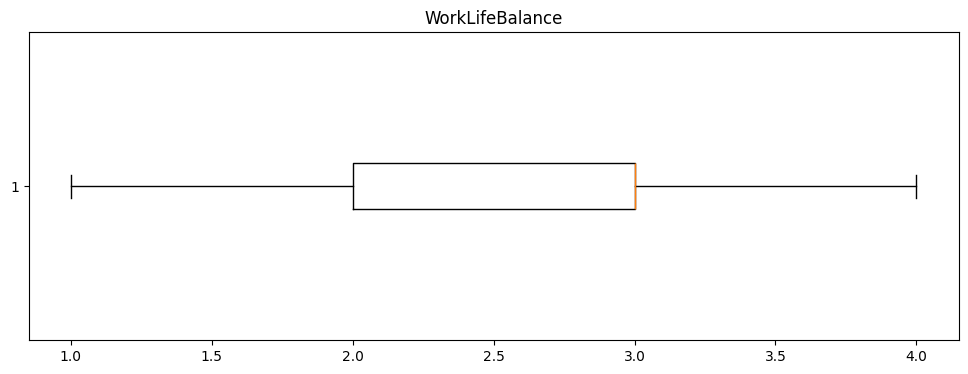

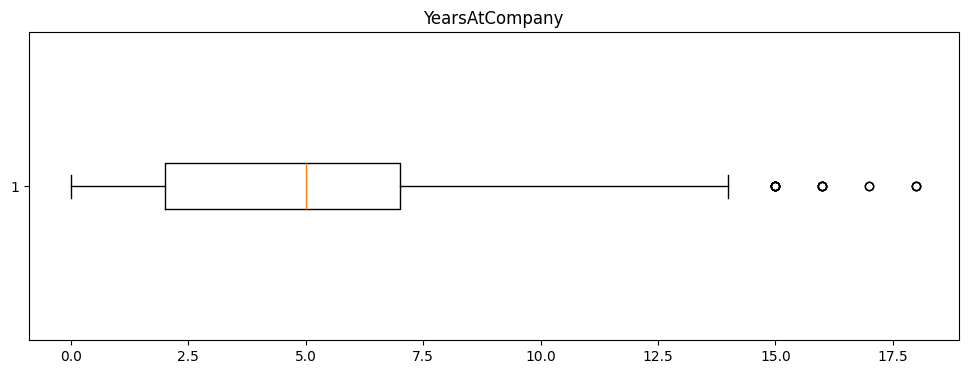

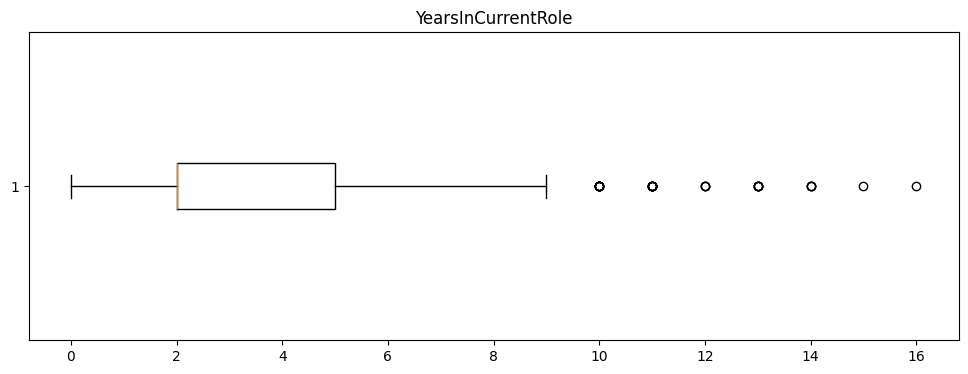

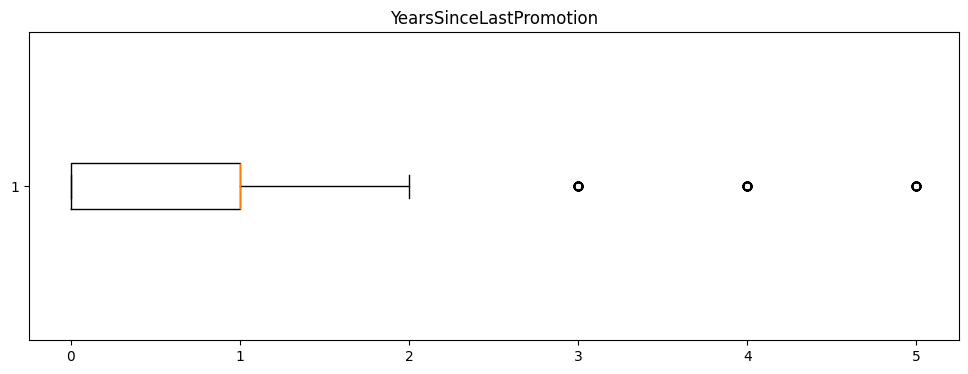

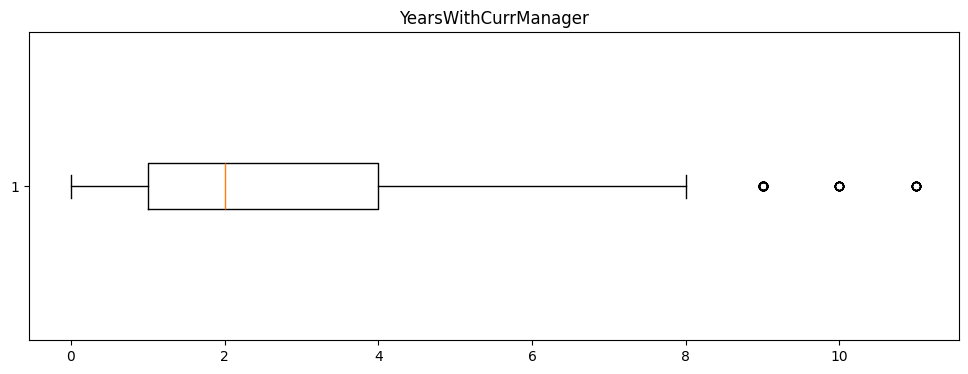

In [14]:
#Recheck the Outliers is present or not.
print("Lets Check there is any Outliers or not.")

for i in numaric_columns:
    plt.figure(figsize=(12,4))
    plt.boxplot(df[i],vert=False)
    plt.title(f"{i}")
# plt.show()

In [15]:
#lets convert the Labeled data into the Numaric data.
print("Lets Convert the Labeled Data into the Numaric Data..........")
print("I am use the LabelEncoder() for do that..........")

encoder = {}

for i in object_columns:
    lb = LabelEncoder()
    df[i] = lb.fit_transform(df[i])
    encoder[i] = lb
print("Encoding is Completed.......")

Lets Convert the Labeled Data into the Numaric Data..........
I am use the LabelEncoder() for do that..........
Encoding is Completed.......


In [16]:
print("Lets see the all the columns......")
print(df.head())

Lets see the all the columns......
   Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0   41          1               2       1102           2                 1   
1   49          0               1        279           1                 8   
2   37          1               2       1373           1                 2   
3   33          0               1       1392           1                 3   
4   27          0               2        591           1                 2   

   Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0          2               1                        2       0  ...   
1          1               1                        3       1  ...   
2          2               4                        4       1  ...   
3          4               1                        4       0  ...   
4          1               3                        1       1  ...   

   PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0      

In [22]:
#Lets Arrange the All the columns into the proper sequance.
print(df.columns)
new_order = [
    'Age', 'BusinessTravel', 'DailyRate', 'Department',
    'DistanceFromHome', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 
    'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 
    'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 
    'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 
    'PerformanceRating', 'RelationshipSatisfaction', 
    'StockOptionLevel', 'TotalWorkingYears', 
    'TrainingTimesLastYear', 'WorkLifeBalance', 
    'YearsAtCompany', 'YearsInCurrentRole', 
    'YearsSinceLastPromotion', 'YearsWithCurrManager', 
    'Attrition'
]

df = df.reindex(columns=new_order)
print("Reindexing is Completed we are arrange the All the columns into the Perticular sequance..............",df)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')
Reindexing is Completed we are arrange the All the columns into the Perticular sequance..............       Age  BusinessTravel  DailyRate  Department  DistanceFromHome  Education  \
0      41               2       1102           2                 1          2   
1      49               1        279           1                 8          1   
2      37    

In [ ]:
#We are Use the Linear Model to Do the Predictions.
x = df.iloc[:,:-1]
y = df['Attrition']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [24]:
#Lets Rescal all the columns That is requered for the Predictions using the StandardScaler.
print("Lets ReScal the all the requered columns...........")
std = StandardScaler()
x_train_scaled = std.fit_transform(x_train)
x_test_scaled = std.transform(x_test)

Lets ReScal the all the requered columns...........


In [ ]:
#Lets Train the LinearRegression Model

lr = LinearRegression()

try:
    lr.fit(x_train_scaled,y_train)
    y_lr_predict = lr.predict(x_test_scaled)

except Exception  as e:
    print(f"Error {e}.")
else: 
    print("Linear Regression Model Performance:\n")
    print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,y_lr_predict),2))
    print("Mean Square Error (MSE):",round(mean_squared_error(y_test,y_lr_predict),2))
    print("Root Mean Squared Error:",round((np.sqrt(mean_squared_error(y_test,y_lr_predict))),4))
    print("Root Mean Squared Error:",round((r2_score(y_test,y_lr_predict)),4))

Linear Regression Model Performance:

Mean Absolute Error (MAE) :  0.27
Mean Square Error (MSE): 0.12
Root Mean Squared Error: 0.3489
Root Mean Squared Error: 0.1592


In [ ]:
#Lets use the Second model fot the best Prediction , we are use the XGBooster
xgb = XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    n_estimators=200,
    learning_rate=0.1,
    max_depth=9
)
try:
    xgb.fit(x_train_scaled,y_train)
    y_xgb_predict = xgb.predict(x_test_scaled)
except Exception  as e:
    print(f"Error {e}.")
else:
    print("Linear Regression Model Performance:\n")
    print("Mean Absolute Error (MAE) : ",round(mean_absolute_error(y_test,y_xgb_predict),2))
    print("Mean Square Error (MSE):",round(mean_squared_error(y_test,y_xgb_predict),2))
    print("Root Mean Squared Error:",round((np.sqrt(mean_squared_error(y_test,y_xgb_predict))),4))
    print("Root Mean Squared Error:",round((r2_score(y_test,y_xgb_predict)),4))

Linear Regression Model Performance:

Mean Absolute Error (MAE) :  0.23
Mean Square Error (MSE): 0.13
Root Mean Squared Error: 0.3607
Root Mean Squared Error: 0.1014


In [42]:
#User Input

print("Lets use the User input for the predictions..........")

# Age = float(input("Enter Age: "))
# BusinessTravel = input("Enter BusinessTravel: ")
# DailyRate = float(input("Enter DailyRate: "))
# Department = input("Enter Department: ")
# DistanceFromHome = float(input("Enter DistanceFromHome: "))
# Education = float(input("Enter Education: "))
# EducationField = input("Enter EducationField: ")
# EnvironmentSatisfaction = float(input("Enter EnvironmentSatisfaction: "))
# Gender = input("Enter Gender: ")
# HourlyRate = float(input("Enter HourlyRate: "))
# JobInvolvement = float(input("Enter JobInvolvement: "))
# JobLevel = float(input("Enter JobLevel: "))
# JobRole = input("Enter JobRole: ")
# JobSatisfaction = float(input("Enter JobSatisfaction: "))
# MaritalStatus = input("Enter MaritalStatus: ")
# MonthlyIncome = float(input("Enter MonthlyIncome: "))
# MonthlyRate = float(input("Enter MonthlyRate: "))
# NumCompaniesWorked = float(input("Enter NumCompaniesWorked: "))
# OverTime = input("Enter OverTime: ")
# PercentSalaryHike = float(input("Enter PercentSalaryHike: "))
# PerformanceRating = float(input("Enter PerformanceRating: "))
# RelationshipSatisfaction = float(input("Enter RelationshipSatisfaction: "))
# StockOptionLevel = float(input("Enter StockOptionLevel: "))
# TotalWorkingYears = float(input("Enter TotalWorkingYears: "))
# TrainingTimesLastYear = float(input("Enter TrainingTimesLastYear: "))
# WorkLifeBalance = float(input("Enter WorkLifeBalance: "))
# YearsAtCompany = float(input("Enter YearsAtCompany: "))
# YearsInCurrentRole = float(input("Enter YearsInCurrentRole: "))
# YearsSinceLastPromotion = float(input("Enter YearsSinceLastPromotion: "))
# YearsWithCurrManager = float(input("Enter YearsWithCurrManager: "))

Age = 35.0
BusinessTravel = "Travel_Rarely"
DailyRate = 800.0
Department = "Research & Development"
DistanceFromHome = 5.0
Education = 3.0
EducationField = "Life Sciences"
EnvironmentSatisfaction = 3.0
Gender = "Male"
HourlyRate = 60.0
JobInvolvement = 3.0
JobLevel = 2.0
JobRole = "Research Scientist"
JobSatisfaction = 4.0
MaritalStatus = "Single"
MonthlyIncome = 6500.0
MonthlyRate = 20000.0
NumCompaniesWorked = 2.0
OverTime = "No"
PercentSalaryHike = 12.0
PerformanceRating = 3.0
RelationshipSatisfaction = 3.0
StockOptionLevel = 1.0
TotalWorkingYears = 8.0
TrainingTimesLastYear = 3.0
WorkLifeBalance = 3.0
YearsAtCompany = 4.0
YearsInCurrentRole = 3.0
YearsSinceLastPromotion = 1.0
YearsWithCurrManager = 2.0

new_data = {
    "Age": Age,
    "BusinessTravel": BusinessTravel,
    "DailyRate": DailyRate,
    "Department": Department,
    "DistanceFromHome": DistanceFromHome,
    "Education": Education,
    "EducationField": EducationField,
    "EnvironmentSatisfaction": EnvironmentSatisfaction,
    "Gender": Gender,
    "HourlyRate": HourlyRate,
    "JobInvolvement": JobInvolvement,
    "JobLevel": JobLevel,
    "JobRole": JobRole,
    "JobSatisfaction": JobSatisfaction,
    "MaritalStatus": MaritalStatus,
    "MonthlyIncome": MonthlyIncome,
    "MonthlyRate": MonthlyRate,
    "NumCompaniesWorked": NumCompaniesWorked,
    "OverTime": OverTime,
    "PercentSalaryHike": PercentSalaryHike,
    "PerformanceRating": PerformanceRating,
    "RelationshipSatisfaction": RelationshipSatisfaction,
    "StockOptionLevel": StockOptionLevel,
    "TotalWorkingYears": TotalWorkingYears,
    "TrainingTimesLastYear": TrainingTimesLastYear,
    "WorkLifeBalance": WorkLifeBalance,
    "YearsAtCompany": YearsAtCompany,
    "YearsInCurrentRole": YearsInCurrentRole,
    "YearsSinceLastPromotion": YearsSinceLastPromotion,
    "YearsWithCurrManager": YearsWithCurrManager
}

new_df = pd.DataFrame([new_data])

temp1 = ['BusinessTravel','Department','EducationField','Gender','JobRole','MaritalStatus','OverTime']

try:
    #Lets encode the all the Labeled Data Columns
    for i in temp1:
        new_df[i] = encoder[i].transform(new_df[i])
    
except Exception as e:
    print(f"Errir {e}")
else:
    print("Encoding is completed..........")
    
#Lets Encode the all the columns.
try:
    new_df = std.transform(new_df)
except Exception as e:
    print(f"Error {e}")
else:
    print("Scal down process is completed.......")


Lets use the User input for the predictions..........
Encoding is completed..........
Scal down process is completed.......


In [46]:
#Prediction Models

#Linear Regressor Model
lr_predict = lr.predict(new_df)
xgboost_output = xgb.predict(new_df)

lr_predict = int(round(lr_predict[0]))
xgboost_output = int(round(xgboost_output[0]))

# print(lr_predict)
# print(xgboost_output)

attrition_encode = encoder['Attrition']

lr_final_prediction = attrition_encode.inverse_transform([lr_predict])[0]
xgb_final_prediction = attrition_encode.inverse_transform([xgboost_output])[0]

print("\n===== Final Predictions (decoded) =====")
print(f"Linear Regression says: Attrition = {lr_final_prediction}")
print(f"XGBoost says: Attrition = {xgb_final_prediction}")

print("\n===== Final Decision based on LinearRegression=====")
if lr_final_prediction == "Yes":
    print("Employee is likely to LEAVE the company.")
else:
    print("Employee is likely to STAY in the company.")

print("\n===== Final Decision based on XGBoost =====")
if xgb_final_prediction == "Yes":
    print("Employee is likely to LEAVE the company.")
else:
    print("Employee is likely to STAY in the company.")


===== Final Predictions (decoded) =====
Linear Regression says: Attrition = No
XGBoost says: Attrition = No

===== Final Decision based on LinearRegression=====
Employee is likely to STAY in the company.

===== Final Decision based on XGBoost =====
Employee is likely to STAY in the company.


In [48]:
models = {
    'linearRegre':'lr',
    'encoder':'encode',
    'standard_scaler':'std',
    'XGBooster':'xgb',
    'temp1_encode_columns':'temp1'
}

with open('Models/model.pkl','wb') as f:
    pickle.dump(models,f)